# Ex Chap 7 XGboost with Iris and Boston house price datasets

In [2]:
import time
import os
import numpy as np
import pandas as pd

import xgboost as xgb
from xgboost import plot_importance,plot_tree

from sklearn.datasets import load_iris,load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

## Classification with XGBoost api

In [48]:
iris = load_iris()
X,y = iris.data, iris.target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

Before running XGBoost, we must set three types of parameters: general parameters, booster parameters and task parameters.

- General parameters relate to which booster we are using to do boosting, commonly tree or linear model

- Booster parameters depend on which booster you have chosen

- Learning task parameters decide on the learning scenario. For example, regression tasks may use different parameters with ranking tasks.

- Command line parameters relate to behavior of CLI version of XGBoost.


In [56]:
# params = {
#     # General Parameters
#     'booster': 'bgtree',  #gbtree (default) and gblinear as they represents
#     'nthread': 4,  # running threads ,default means max # of threads
#     'silent': 0,  # printing realtime info
#     'num_feature': 4,  #Feature dimension used in boosting
#     # Command Parameters
#     'objective':
#     'multi:softmax',  # set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes
#     'num_class': 3,  # # of classes
#     # Boosting Parameters
#     'gamma': 0.1,
#     # Minimum loss reduction required to make a further partition on a leaf node of the tree.
#     'max_depth': 6,  # Maximum depth of a tree
#     'lambda': 2,  # weight of regularization
#     'subsample': 0.7,
#     # Subsample ratio of the training instances, preveting overfitting
#     'colsample_bytree': 0.7,
#     #Subsample ratio of columns when constructing each tree.
#     'min_child_weight': 3,
#     # Minimum sum of instance weight (hessian) needed in a child
#     'eta':
#     0.1,  # Step size shrinkage in additive model used in update to prevents overfitting.
# }

# plst = list(params.items())

In [87]:
params = {
    # General Parameters
    'booster': 'gbtree',
    'nthread': 4,
    'silient': 0,
    'num_feature': 4,  
    'seed': 1000,
    # Command Parameters
    'objective': 'multi:softmax',  
    'num_class': 3,  
    # Boosting Parameters
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'eta': 0.1,
}
plst = list(params.items())

plst = list(params.items()) 

In [88]:
# Dataset transformation

dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test)

DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

In [91]:
# train
num_rounds = 50 # # of iterations, # of all learners = #(interations) * #(classes)
model = xgb.train(plst,dtrain,num_rounds)

[14:06:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "silient" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:06:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
# Predicting
y_pred = model.predict(dtest)

In [93]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {round(accuracy,4)}")

Accuracy : 0.9667


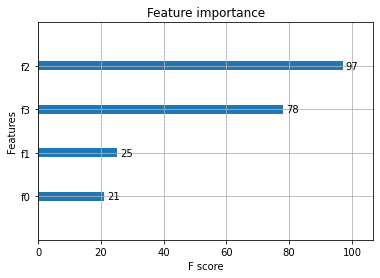

In [94]:
# Feature Importances
plot_importance(model)
plt.show()

<AxesSubplot:>

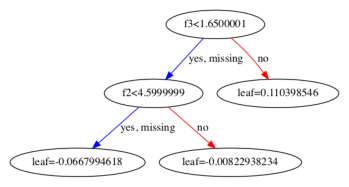

In [104]:
# Visualize the trees
plot_tree(model,num_trees = 5)

you need to install both graphviz and python-graphviz

In [105]:
# exprot the basic learners to txt
model.dump_model('./img/xbgmodel.txt')

## Regression with XGBoost api

In [110]:
boston = load_boston()
X,y = boston.data,boston.target
feature_name = boston.feature_names
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [114]:
# Dataset transformation

dtrain = xgb.DMatrix(X_train, y_train,feature_names = feature_name)
dtest = xgb.DMatrix(X_test, feature_names=feature_name)

In [122]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',  # gamma regression loss function
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silient': 1,
    'eta': 0.1,
    'nthread': 4,
    'seed': 1000,
}

plst = list(params.items())

In [123]:
# train
num_rounds = 30
model = xgb.train(plst, dtrain, num_rounds)

[14:46:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "silient" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [124]:
# predict
y_pred = model.predict(dtest)

In [127]:
# No Calculating the accuracy:continuous is not supported


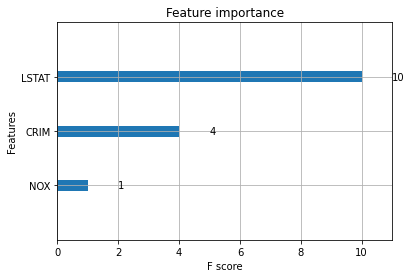

In [128]:
# Feature Importances
plot_importance(model,importance_type="weight")
plt.show()

<AxesSubplot:>

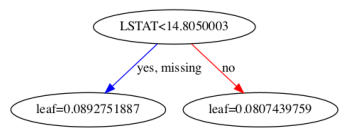

In [133]:
plot_tree(model,num_trees=18)

### sklearn